## 支持向量机 （SVM）

1.Vapnik-Chervonenkis， svm是包含VC维学习理论的统计学习方法。

SVM是统计学习的一种方法，通过核方法**(kernel method)** 在样本集中选择支持向量样本点，来实现最后的决策(超)平面。

## 线性分类器

假设有两个样本点，正例（postive）点（1，6），负例（negtive）点（6，1），对于这样一个分类问题，就是找到一条直线，使得两样本点分别到直线的距离最大。由简单的几何知识可知，这样的一条线就是两点连线的垂直平分线。

In [2]:
%matplotlib inline
import numpy as np
from matplotlib.pylab import subplots
import os

In [3]:
np.random.seed(0)

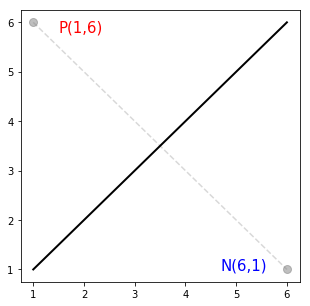

In [4]:
px = (1,6)
py = (6,1)
x = np.linspace(1, 6, 100)
fig,ax=subplots()
fig.set_size_inches((5,5))
_=ax.plot(px,py,'o',alpha=.5,color='gray',ms=8)
_=ax.plot(px,py,'--',alpha=.3,color='gray')
_=ax.plot(x,x,color='k',lw=2)
_=ax.text(1.5,5.8, 'P(1,6)', fontdict={'size': 15, 'color': 'red'})
_=ax.text(4.7,1.0, 'N(6,1)', fontdict={'size': 15, 'color': 'blue'})

很简单地，上图中的黑线就是一个线性分类器，它的左上侧出现的样本将会被推断为正例，右下出现的样本将会被推断为负例。那么，如何将以上直觉化的思路推广到一些复杂的情况呢？比如200个样本点的数据集，该如何分类呢。
1. 如果对于每个数据点，都具有相同的权重，该类别的几何中心为该类别的聚类中心，线性分类器就是每两个类别中心的“垂直平分线”；
2. 当越靠近分界线的数据点权重越大， 线性分类器就是Logistic回归；
3. 分界线的决定至取决到分界线距离最近的数据点时，这就是支持向量机，能够决定决策的数据点集就是支持向量。

In [5]:
mu1_fact = (1, 6)
cov1_fact = np.diag((0.5, 0.6))
data1 = np.random.multivariate_normal(mu1_fact, cov1_fact, 100)
mu2_fact = (6, 1)
cov2_fact = np.diag((0.5, 0.6))
data2 = np.random.multivariate_normal(mu2_fact, cov2_fact, 100)
data = np.vstack((data1, data2))
y = np.array([True] * 100 + [False] * 100)
# print(data.shape)

In [6]:
# Where to save the figures
def save_fig(fig_id, tight_layout=True):
    path = os.path.join(".", "img", fig_id + ".png")
#     print("Saving figure", fig_id)
    if tight_layout:
        fig.tight_layout()
    fig.savefig(path, format='png', dpi=300)

Saving figure svm-001


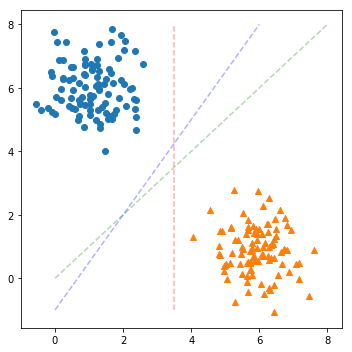

In [7]:
fig,ax=subplots()
fig.set_size_inches((5,5))
_ = ax.scatter(data[:100,0],data[:100,1], marker='o')
_ = ax.scatter(data[100:,0],data[100:,1], marker='^')

_ = ax.plot((3.5,3.5),(-1,8),'--',alpha=.3,color='r',lw=1.5)
_ = ax.plot((0,6),(-1,8),'--',alpha=.3,color='b',lw=1.5)
_ = ax.plot((0,8),(0,8),'--',alpha=.3,color='g',lw=1.5)

save_fig("svm-001")


顺着SVM的思路(距离最大化），计算一下上图中RBG三色分类器，哪个分类决策线的性能更好。

In [15]:
d_R = abs(data1[:,0]-3.5).min()+abs(data2[:,0]-3.5).min()
d_G = (abs(data1[:,0]-data1[:,1]).min()+abs(data2[:,0]-data2[:,1]).min())/np.sqrt(1+1)
d_B = (abs(data1[:,0]*1.5-data1[:,1]-1).min()+abs((data2[:,0]*1.5-data2[:,1]-1)).min())/np.sqrt(1.5**2+1)

d_R,d_G,d_B

(1.4549300833918464, 3.3075620322780983, 3.1928796266286921)

绿色分类线的在当前数据集下的结果最好，当然这也是最直观的结果。

In [16]:
# import numpy as np
# import tensorflow as tf
from sklearn.datasets import make_moons
import matplotlib.pyplot as plt
from sklearn.svm import SVC #using SVM  as a classifier\

In [3]:


np.random.seed(1)
moon_data, moon_label = make_moons(200, noise=0.1)

In [4]:
model = 'linear'
sv = SVC(kernel=model)
sv.fit(moon_data, moon_label)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [6]:
# 绘制决策等高图函数
def plot_decision_boundary(data, pred_func):
    x_min, x_max = data[:, 0].min() - .5, data[:, 0].max() + .5
    y_min, y_max = data[:, 1].min() - .5, data[:, 1].max() + .5
    
#     x_min, x_max = moon_data[:, 0].min() - .5, moon_data[:, 0].max() + .5
#     y_min, y_max = moon_data[:, 1].min() - .5, moon_data[:, 1].max() + .5
    
    h = 0.01

    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    label = pred_func(np.c_[xx.ravel(), yy.ravel()])
    label = label.reshape(xx.shape)
    plt.contourf(xx, yy, label, cmap=plt.cm.Spectral ) #

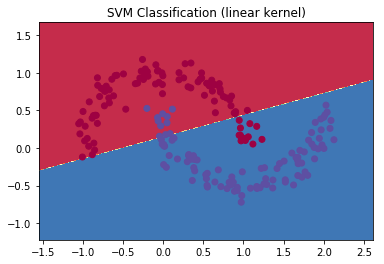

In [7]:
plot_decision_boundary(moon_data, (lambda x: sv.predict(x)))
plt.scatter(moon_data[:,0], moon_data[:,1], c=moon_label, cmap=plt.cm.Spectral)
plt.title("SVM Classification (linear kernel)")
plt.show()

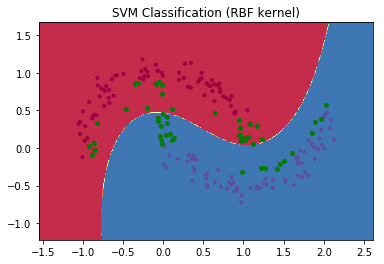

In [8]:
model = 'rbf'
sv = SVC(kernel=model)
sv.fit(moon_data, moon_label)
plot_decision_boundary(moon_data, (lambda x: sv.predict(x)))
plt.scatter(moon_data[:,0], moon_data[:,1], c=moon_label,s=10, cmap=plt.cm.Spectral)
plt.scatter(sv.support_vectors_[:,0],sv.support_vectors_[:,1],c='g', s=15)
plt.title("SVM Classification (RBF kernel)")  # Guasis
plt.show()

上图为高斯核的SVM分类器的分类效果,图中绿色的点就是所谓的支持向量,而其他的样本点没有参与决策分类面的构建。